FM模型可以用於回歸任務、二分類任務、排名任務，特別是在數據稀疏場景下，效果明顯，廣泛應用於推薦系統、廣告系統等領域。

**傳統線性模型**
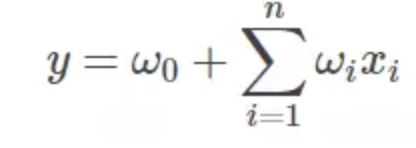

**初始FM模型**
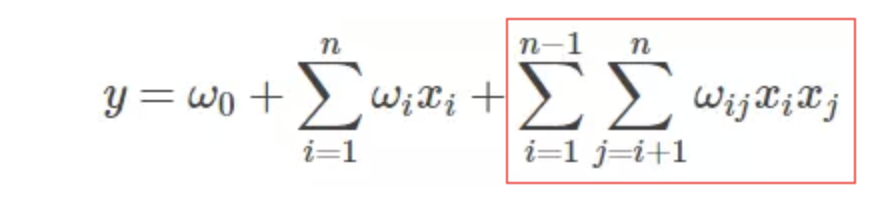

**近似FM模型**
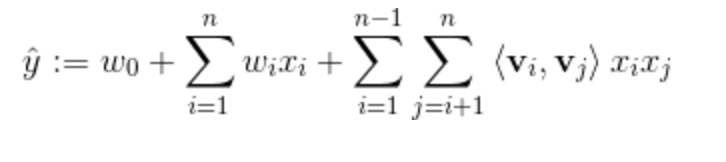

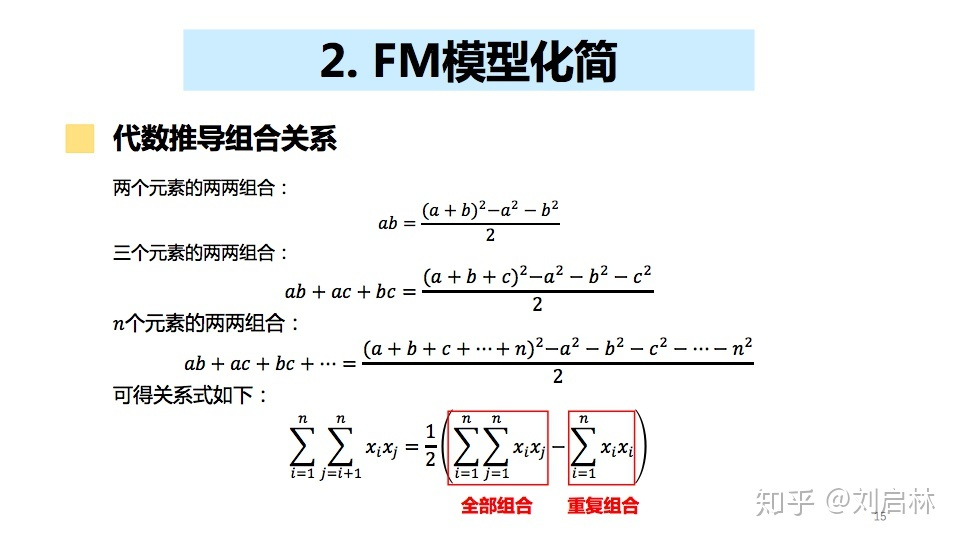

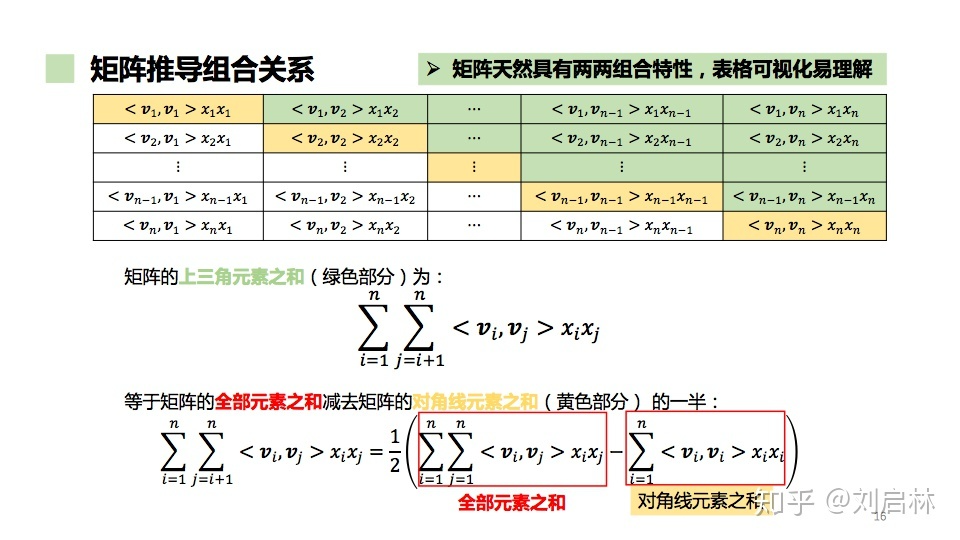

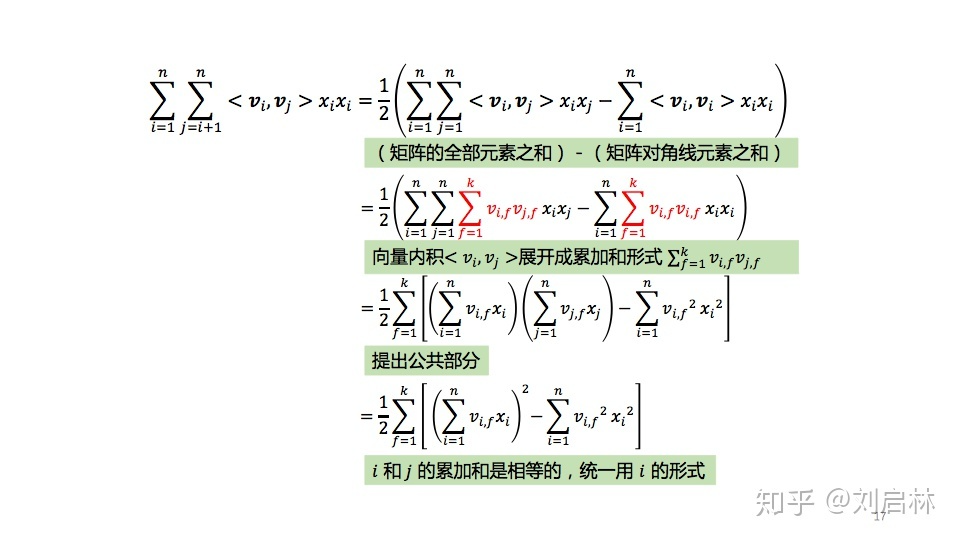

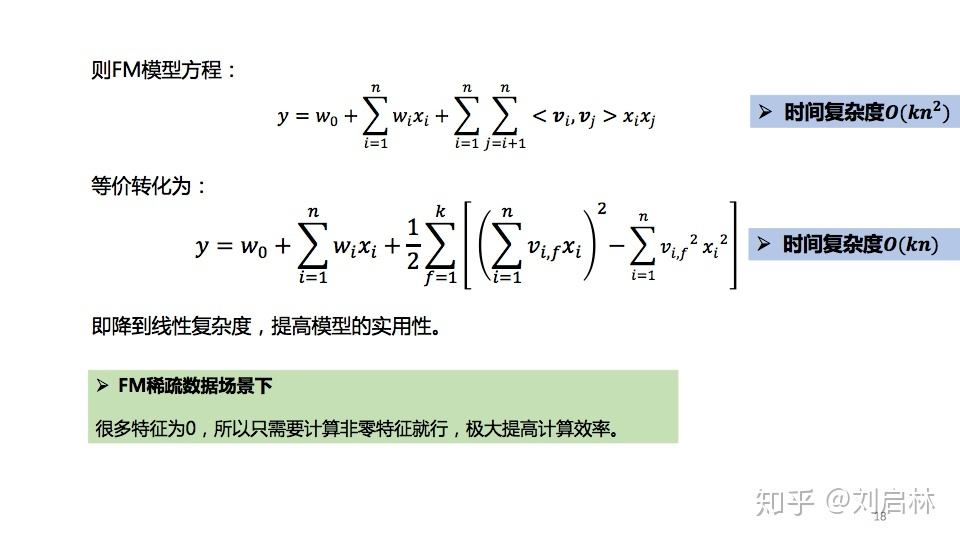

# 使用糖尿病資料庫做分析

In [82]:
import numpy as np
from random import normalvariate
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [83]:
diabetes = load_diabetes()
diabetes.data, diabetes.target

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [84]:
X = diabetes.data
y = diabetes.target
X_train, Y_train, X_test, Y_test =  train_test_split(X,y, test_size=0.3, random_state=200)

In [81]:
max(y),min(y)
split = (max(y)+min(y))/2
split

185.5

In [85]:
#共有214個lable
len(set(y))
#以160作為分界
X_test[X_test<185] = -1
X_test[X_test>=185] = 1

In [86]:
Y_test[Y_test<185] = -1
Y_test[Y_test>=185] = 1

In [87]:
X_train.shape, Y_train.shape

((309, 10), (133, 10))

In [88]:
X_test.shape, Y_test.shape

((309,), (133,))

In [89]:
MM = MinMaxScaler()
X_train = MM.fit_transform(X_train)
Y_train = MM.fit_transform(Y_train)

In [90]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

 
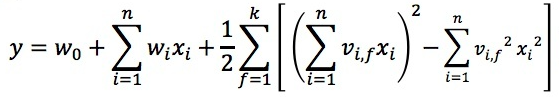

Loss function
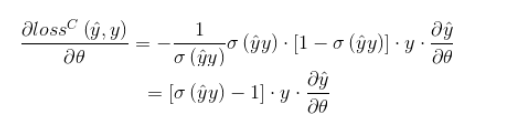

In [97]:
#按照公式來敲函式
# datamatrix = tranalpha是学习速率
def sgd_fm(datamatrix, label, k, iter_num, alpha):
    '''
    datamatrix = train data, dtypes = array
    label = data label, dtypes = array
    k = feature potential, dtypes = int
    iter_num = iteration number, dtypes = int
    alpha = learning rate, dtypes = int
    '''
    m, n = datamatrix.shape
    w0 = 0.0
    w = np.zeros((n, 1))
    #normalvariate(mean,std)
    v = normalvariate(0, 0.2) * np.ones((n, k))
    for it in range(iter_num):
        for i in range(m):
            # inner1 = # Xi·Vi
            inner1 = datamatrix[i] * v
            #inner2 = Xi^2,*Vi^2
            inner2 = np.multiply(datamatrix[i], datamatrix[i]) * np.multiply(v, v)
            
            interaction = sum((np.multiply(inner1, inner1) - inner2)) / 2.0
            #prediction
            ypredict = w0 + datamatrix[i] * w + interaction
            
            yp = sigmoid(label[i]*ypredict[0, 0])
 
            loss = 1 - (-(np.log(yp)))
            
            # 更新参数
            w0 = w0 - alpha * (yp - 1) * label[i] * 1
            for j in range(n):
                if datamatrix[i, j] != 0:
                    w[j]-= alpha * (yp - 1) * label[i] * datamatrix[i, j]
                    for k in range(k):
                        v[j, k] = v[j, k] - alpha * ((yp - 1) * label[i] * \
                                  (datamatrix[i, j] * inner1[0, k] - v[j, k] * \
                                  datamatrix[i, j] * datamatrix[i, j]))
        if it % 10 == 0:
            print(f'第{it}次訓練誤差為：{loss}')
    
    return w0, w, v

In [93]:
def predict(w0, w, v, x, threshold = 0.5):
    inner1 = x * v
    inner2 = np.multiply(x, x) * np.multiply(v, v)
    interaction = np.sum((np.multiply(inner1, inner1) - inner2), axis=1) / 2.0
    ypredict = w0 + x * w + interaction
    y0 = sigmoid(ypredict[0,0])
    if y0 > threshold:
        yp = 1
    else:
        yp = -1
    return yp

In [98]:
def calaccuracy(datamatrix, label, w0, w, v, threshold):
    predicted_label = []
    for i in range(np.shape(datamatrix)[0]):
        yp = predict(w0, w, v, datamatrix[i], threshold)
        predicted_label.append(yp)
    accuray = accuracy_score(label, predicted_label)
    return accuray

#datamatrix, label, k, iter_num, alpha
w0, w, v = sgd_fm(X_train, X_test, 10, 500, 0.003)
maxaccuracy = 0.0
tmpthold = 0.0


for i in np.linspace(0.3, 0.6, 301):
    accuracy_test = calaccuracy(Y_train, Y_test, w0, w, v, i)
    if accuracy_test > maxaccuracy:
        maxaccuracy = accuracy_test
        tmpthold = i
print(accuracy_test, tmpthold)

第0次訓練誤差為：0.2102740262199948
第10次訓練誤差為：-0.07688308005325517
第20次訓練誤差為：-0.06462138324624034
第30次訓練誤差為：-0.03460224898331288
第40次訓練誤差為：-0.0065210215662818705
第50次訓練誤差為：0.018664716011105864
第60次訓練誤差為：0.0412319017994488
第70次訓練誤差為：0.06149405496256899
第80次訓練誤差為：0.07972617774113444
第90次訓練誤差為：0.09616578426592892
第100次訓練誤差為：0.11101823113756071
第110次訓練誤差為：0.12446153143673266
第120次訓練誤差為：0.13665043426579393
第130次訓練誤差為：0.14771985956936673
第140次訓練誤差為：0.15778778752079092
第150次訓練誤差為：0.16695769001813865
第160次訓練誤差為：0.17532057912476484
第170次訓練誤差為：0.1829567356230688
第180次訓練誤差為：0.1899371705898827
第190次訓練誤差為：0.19632486408801797
第200次訓練誤差為：0.20217581761128833
第210次訓練誤差為：0.20753995067536046
第220次訓練誤差為：0.21246186675196999
第230次訓練誤差為：0.21698150944232641
第240次訓練誤差為：0.22113472623248454
第250次訓練誤差為：0.2249537542432416
第260次訓練誤差為：0.22846763997155806
第270次訓練誤差為：0.23170260302874168
第280次訓練誤差為：0.23468235223696643
第290次訓練誤差為：0.23742836108771825
第300次訓練誤差為：0.23996010844211546
第310次訓練誤差為：0.24229528942150702
第320次訓練誤差為：0.2444